# Asst1 - Prog1 writeup

We experiment on an AMD Ryzen 5 3600 6-Core Processor with SMT enabled (so 12 threads in total)

https://en.wikichip.org/wiki/amd/ryzen_5/3600

In [1]:
!ls

main.cpp    mandelbrotSerial.cpp   mandelbrot-thread.ppm  result.log
Makefile    mandelbrot-serial.ppm  objs			  run.sh
mandelbrot  mandelbrotThread.cpp   plot.ipynb


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [24]:
df = pd.read_csv('result_before_opt.log',names=["viewIndex","numThreads","minSerial","minThread","speedup"])

df

,viewIndex,numThreads,minSerial,minThread,speedup
0,1,1,0.520074,0.521194,0.997852
1,1,2,0.532481,0.276994,1.922360
2,1,3,0.603338,0.374402,1.611470
3,1,4,0.288907,0.121438,2.379060
4,1,5,0.427884,0.177130,2.415650
5,1,6,0.591539,0.195910,3.019440
6,1,7,0.610179,0.191588,3.184850
7,1,8,0.424881,0.113096,3.756810
8,1,9,0.540124,0.132136,4.087630
9,1,10,0.531472,0.110771,4.797920


Text(0, 0.5, 'Speedup')

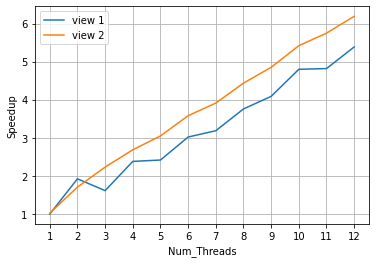

In [30]:
fig = plt.figure()

plt.grid()
for v in range(1,3):
    df_of_interest = df[df["numThreads"]<=12]
    x = df_of_interest[v==df_of_interest["viewIndex"]].numThreads
    y = df_of_interest[v==df_of_interest["viewIndex"]].speedup   
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x,y,label='view {view}'.format(view=v))
    plt.legend()
plt.xlabel('Num_Threads')
plt.ylabel('Speedup')

Hypothesis: Uneven task decomposition

To confirm.


![running_captures/before_opt](running_captures/prog1_before_opt_spatial_decomposition.png)

Now instead of decompose the task into blocks, we assign each thread with fine-grained line decomposition.

We get the following result:

![after_opt](running_captures/prog1_after_opt_fine_grained_decomposition.png)

In [9]:

df2 = pd.read_csv('result.log',names=["viewIndex","numThreads","minSerial","minThread","speedup"])

df2

,viewIndex,numThreads,minSerial,minThread,speedup
0,1,1,0.598659,0.596957,1.002850
1,1,2,0.493934,0.256875,1.922860
2,1,3,0.304800,0.107761,2.828480
3,1,4,0.481816,0.133414,3.611430
4,1,5,0.432303,0.097317,4.442200
5,1,6,0.565157,0.109211,5.174920
6,1,7,0.631381,0.101471,6.222290
7,1,8,0.320330,0.048582,6.593640
8,1,9,0.290139,0.039816,7.287010
9,1,10,0.590868,0.074107,7.973200


Text(0, 0.5, 'Speedup')

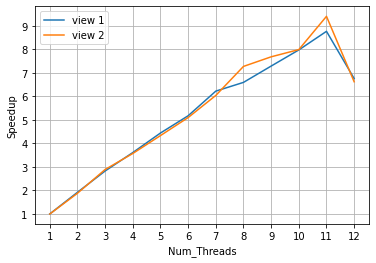

In [13]:
fig = plt.figure()

plt.grid()
for v in range(1,3):
    df_of_interest2 = df2[df2["numThreads"]<=12]
    x = df_of_interest2[v==df_of_interest2["viewIndex"]].numThreads
    y = df_of_interest2[v==df_of_interest2["viewIndex"]].speedup   
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.yticks(np.arange(min(y), max(y)+1, 1.0))

    plt.plot(x,y,label='view {view}'.format(view=v))
    plt.legend()
plt.xlabel('Num_Threads')
plt.ylabel('Speedup')

It is not noticably greater, since the number of threads are greater than the maximum cores on the machine (12). Hence context switching consumes a lot of time.

In [21]:
df2[df2["numThreads"]==12]

,viewIndex,numThreads,minSerial,minThread,speedup
11,1,12,0.520160,0.076999,6.75544
24,2,12,0.294177,0.044433,6.62066


In [20]:
df2[df2["numThreads"]==24]

,viewIndex,numThreads,minSerial,minThread,speedup
12,1,24,0.379375,0.046844,8.09872
25,2,24,0.334468,0.040185,8.32330
